In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import fetch_openml

# Load dataset
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame

### Dataset Description:

* CRIM  :Per capita crime rate by town
* ZN	:Proportion of residential land zoned for large lots
* INDUS	:Proportion of non-retail business acres per town
* CHAS	:Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX	:Nitrogen oxide concentration (pollution level)
* RM	:Average number of rooms per dwelling
* AGE	:Proportion of owner-occupied units built before 1940
* DIS	:Distance to employment centers
* RAD	:Index of accessibility to highways
* TAX	:Property tax rate per 10,000
* PTRATIO	:Pupil-teacher ratio by town
* B	    :Proportion of Black residents
* LSTAT	:Percentage of lower-status population
* MEDV(Target)	:Median value of owner-occupied homes in 1000

In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


In [5]:
# Summary statistics
df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


* CRIM (Crime Rate): Highly skewed, with an average of 3.61 but a median of 0.256, suggesting extreme outliers.
* ZN (Zoning Land %): 50% of the houses have 0% zoning (urban areas), but some reach 100% zoning, showing mixed urban-suburban data.
* RM (Rooms per Dwelling): The average is 6.28, but ranges from 3.56 (small houses) to 8.78 (large luxury homes).
* AGE (Old Homes %): The median age is 77.5 years, suggesting many older homes in Boston.
* LSTAT (Lower-Class Population %): Ranges from 1.73% to 37.97%, highlighting strong economic disparities.
* MEDV (Median Home Price): The mean house price is 22.53K Dollar, but there are significant outliers up to $50K.

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
# Check missing values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

No missing valuese

In [8]:
# Identify categorical columns
categorical_cols = ['CHAS', 'RAD']
print("Categorical Columns:", categorical_cols)

Categorical Columns: ['CHAS', 'RAD']


In [9]:
# Identify numerical columns
numerical_cols = [col for col in df.columns if col not in categorical_cols]
print("Numerical Columns:", numerical_cols)

Numerical Columns: ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [10]:
df['CHAS'].unique()

['0', '1']
Categories (2, object): ['0', '1']

In [11]:
df['RAD'].unique()

['1', '2', '3', '5', '4', '8', '6', '7', '24']
Categories (9, object): ['1', '2', '24', '3', ..., '5', '6', '7', '8']

Text(0.5, 1.0, 'Distribution of CHAS')

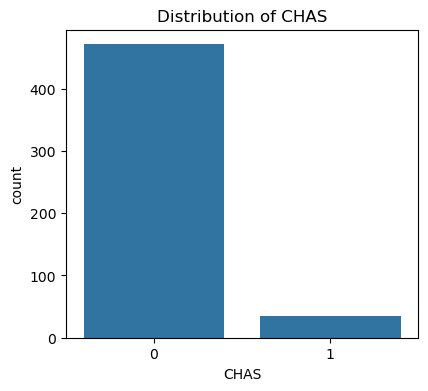

In [12]:
plt.figure(figsize=(10,4))

# CHAS (River Proximity)
plt.subplot(1,2,1)
sns.countplot(x=df['CHAS'])
plt.title("Distribution of CHAS")

Most houses are not near the river (CHAS = 0).

Text(0.5, 1.0, 'Distribution of RAD')

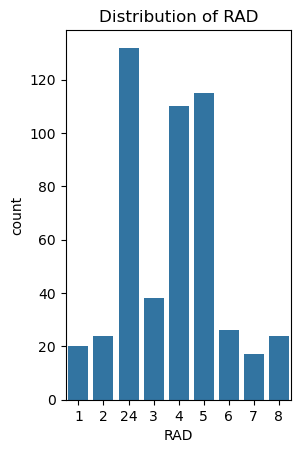

In [13]:
# RAD (Highway Accessibility)
plt.subplot(1,2,2)
sns.countplot(x=df['RAD'])
plt.title("Distribution of RAD")

The RAD column is skewed, meaning some highway accessibility levels dominate.

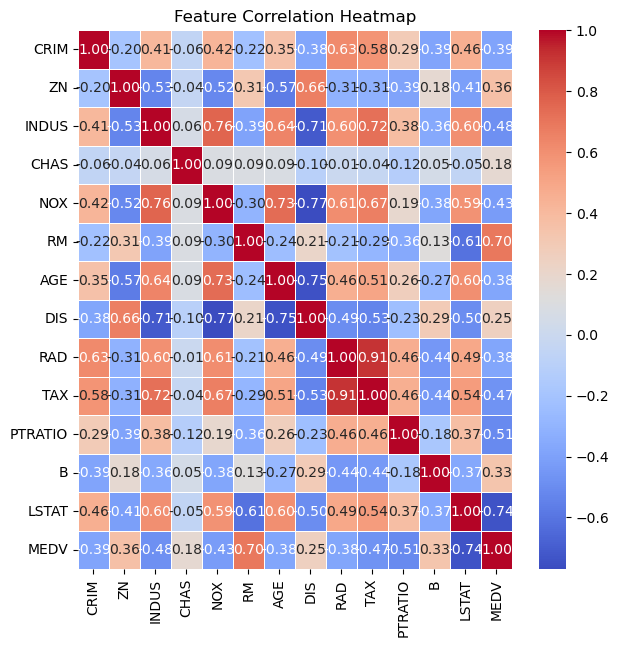

In [14]:
plt.figure(figsize=(7, 7))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

* RM (Rooms per Dwelling) vs. MEDV: Higher RM → Higher house price
* LSTAT (Lower-Class Population %) vs. MEDV: Higher LSTAT → Lower house price
* CRIM (Crime Rate) vs. MEDV: High crime → Lower house price
* TAX (Property Tax) & PTRATIO (Pupil-Teacher Ratio) vs. MEDV: Higher taxes & class sizes → Lower house price
* AGE (Older Homes %) has a weak negative correlation with MEDV, meaning older homes tend to be cheaper.

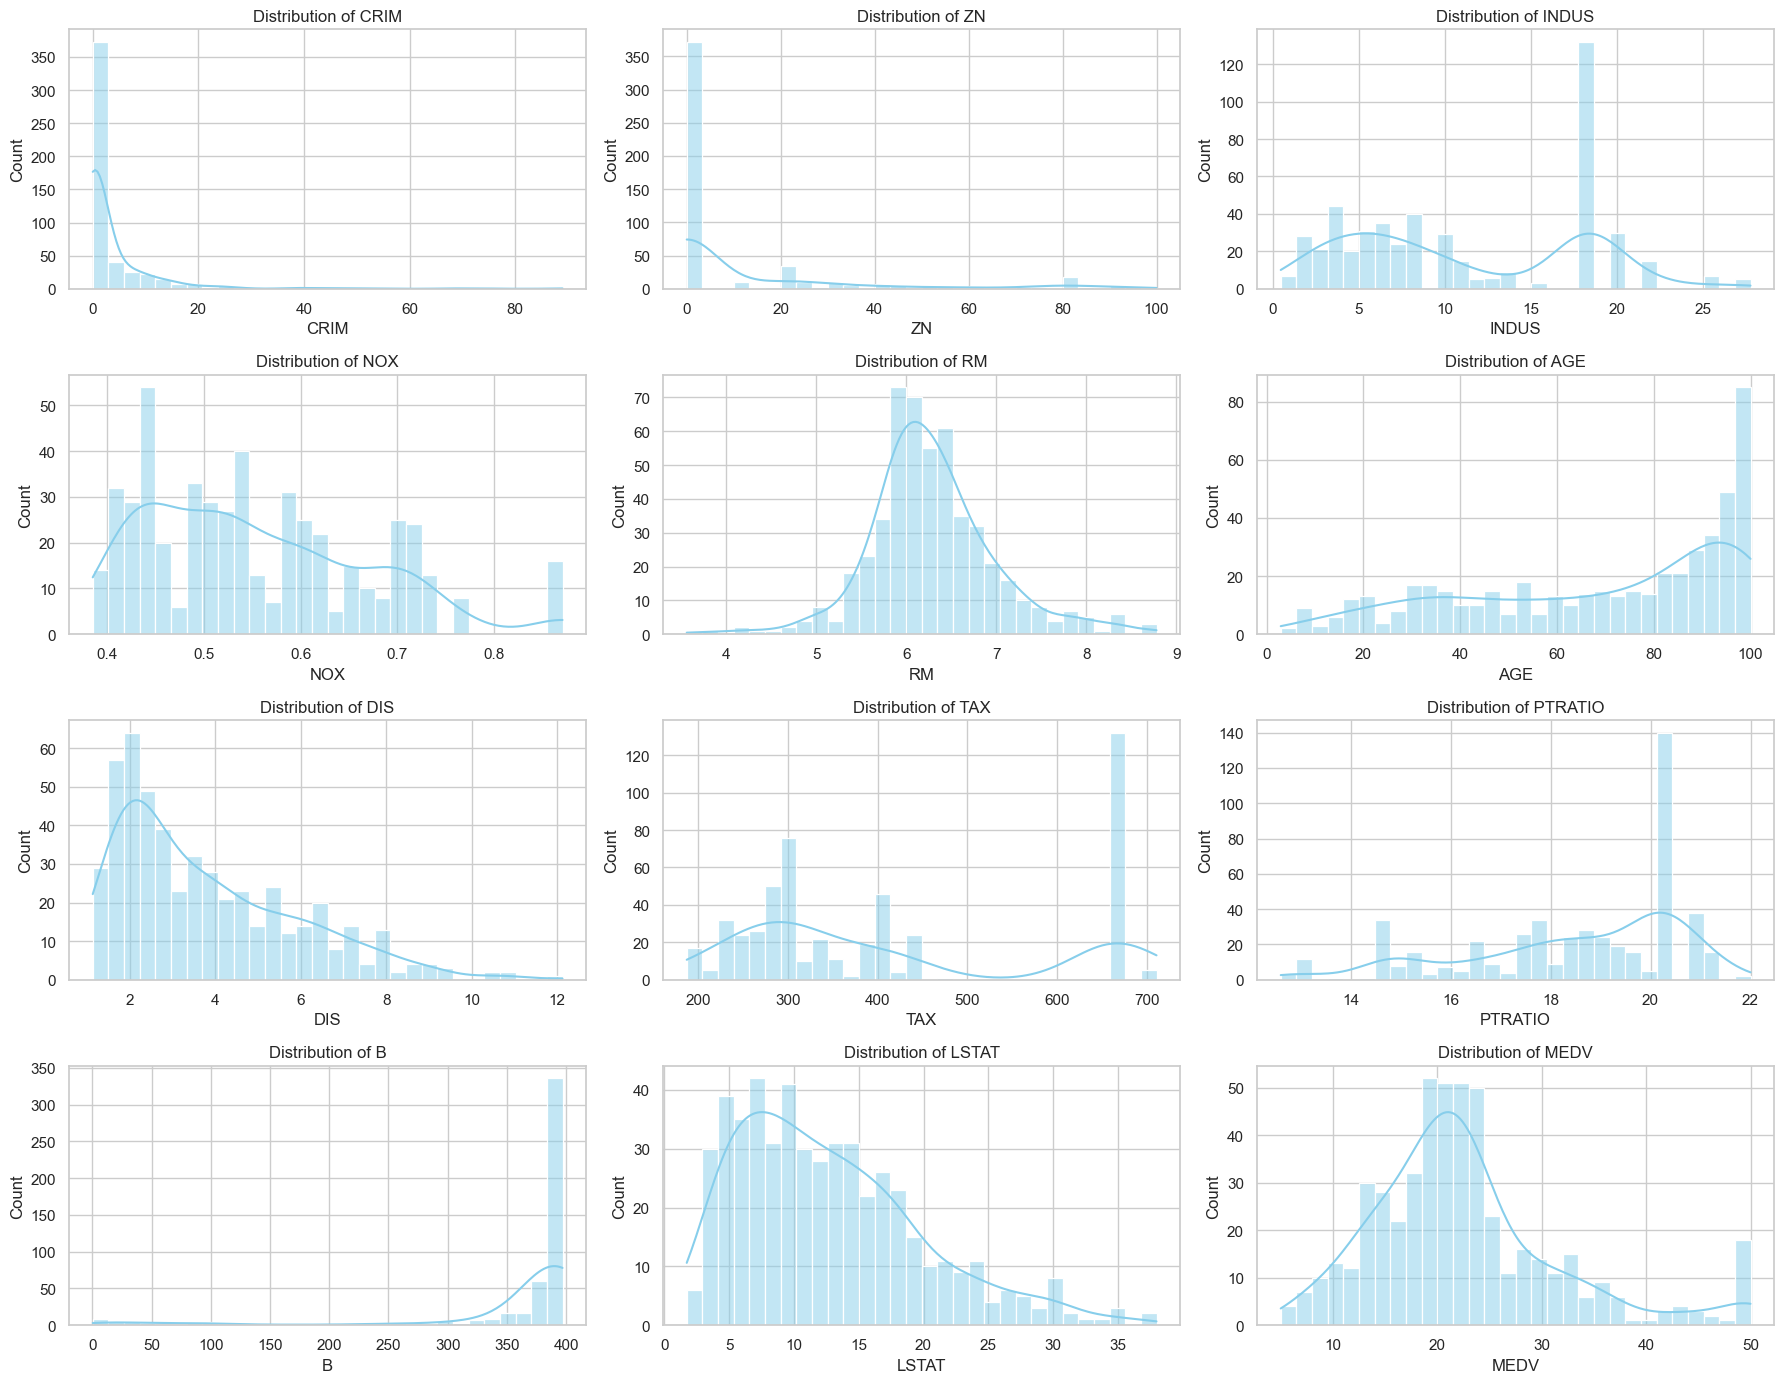

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for visualization
sns.set(style="whitegrid")

# Plot histograms for each feature
features = ["CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
plt.figure(figsize=(18, 14))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    sns.histplot(df[feature], kde=True, color="skyblue", bins=30)
    plt.title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()


* CRIM (Crime Rate): Skewed distribution with long tail on the right.
* ZN (Residential Zoning): Most of the values are 0 (urban areas) with some peaking at 100% zoning.
* LSTAT (Lower Status Population %): Skewed to the right, suggesting that most areas have relatively low poverty rates.
* MEDV (Median House Prices): A slight skew to the right but relatively symmetric around the mean.

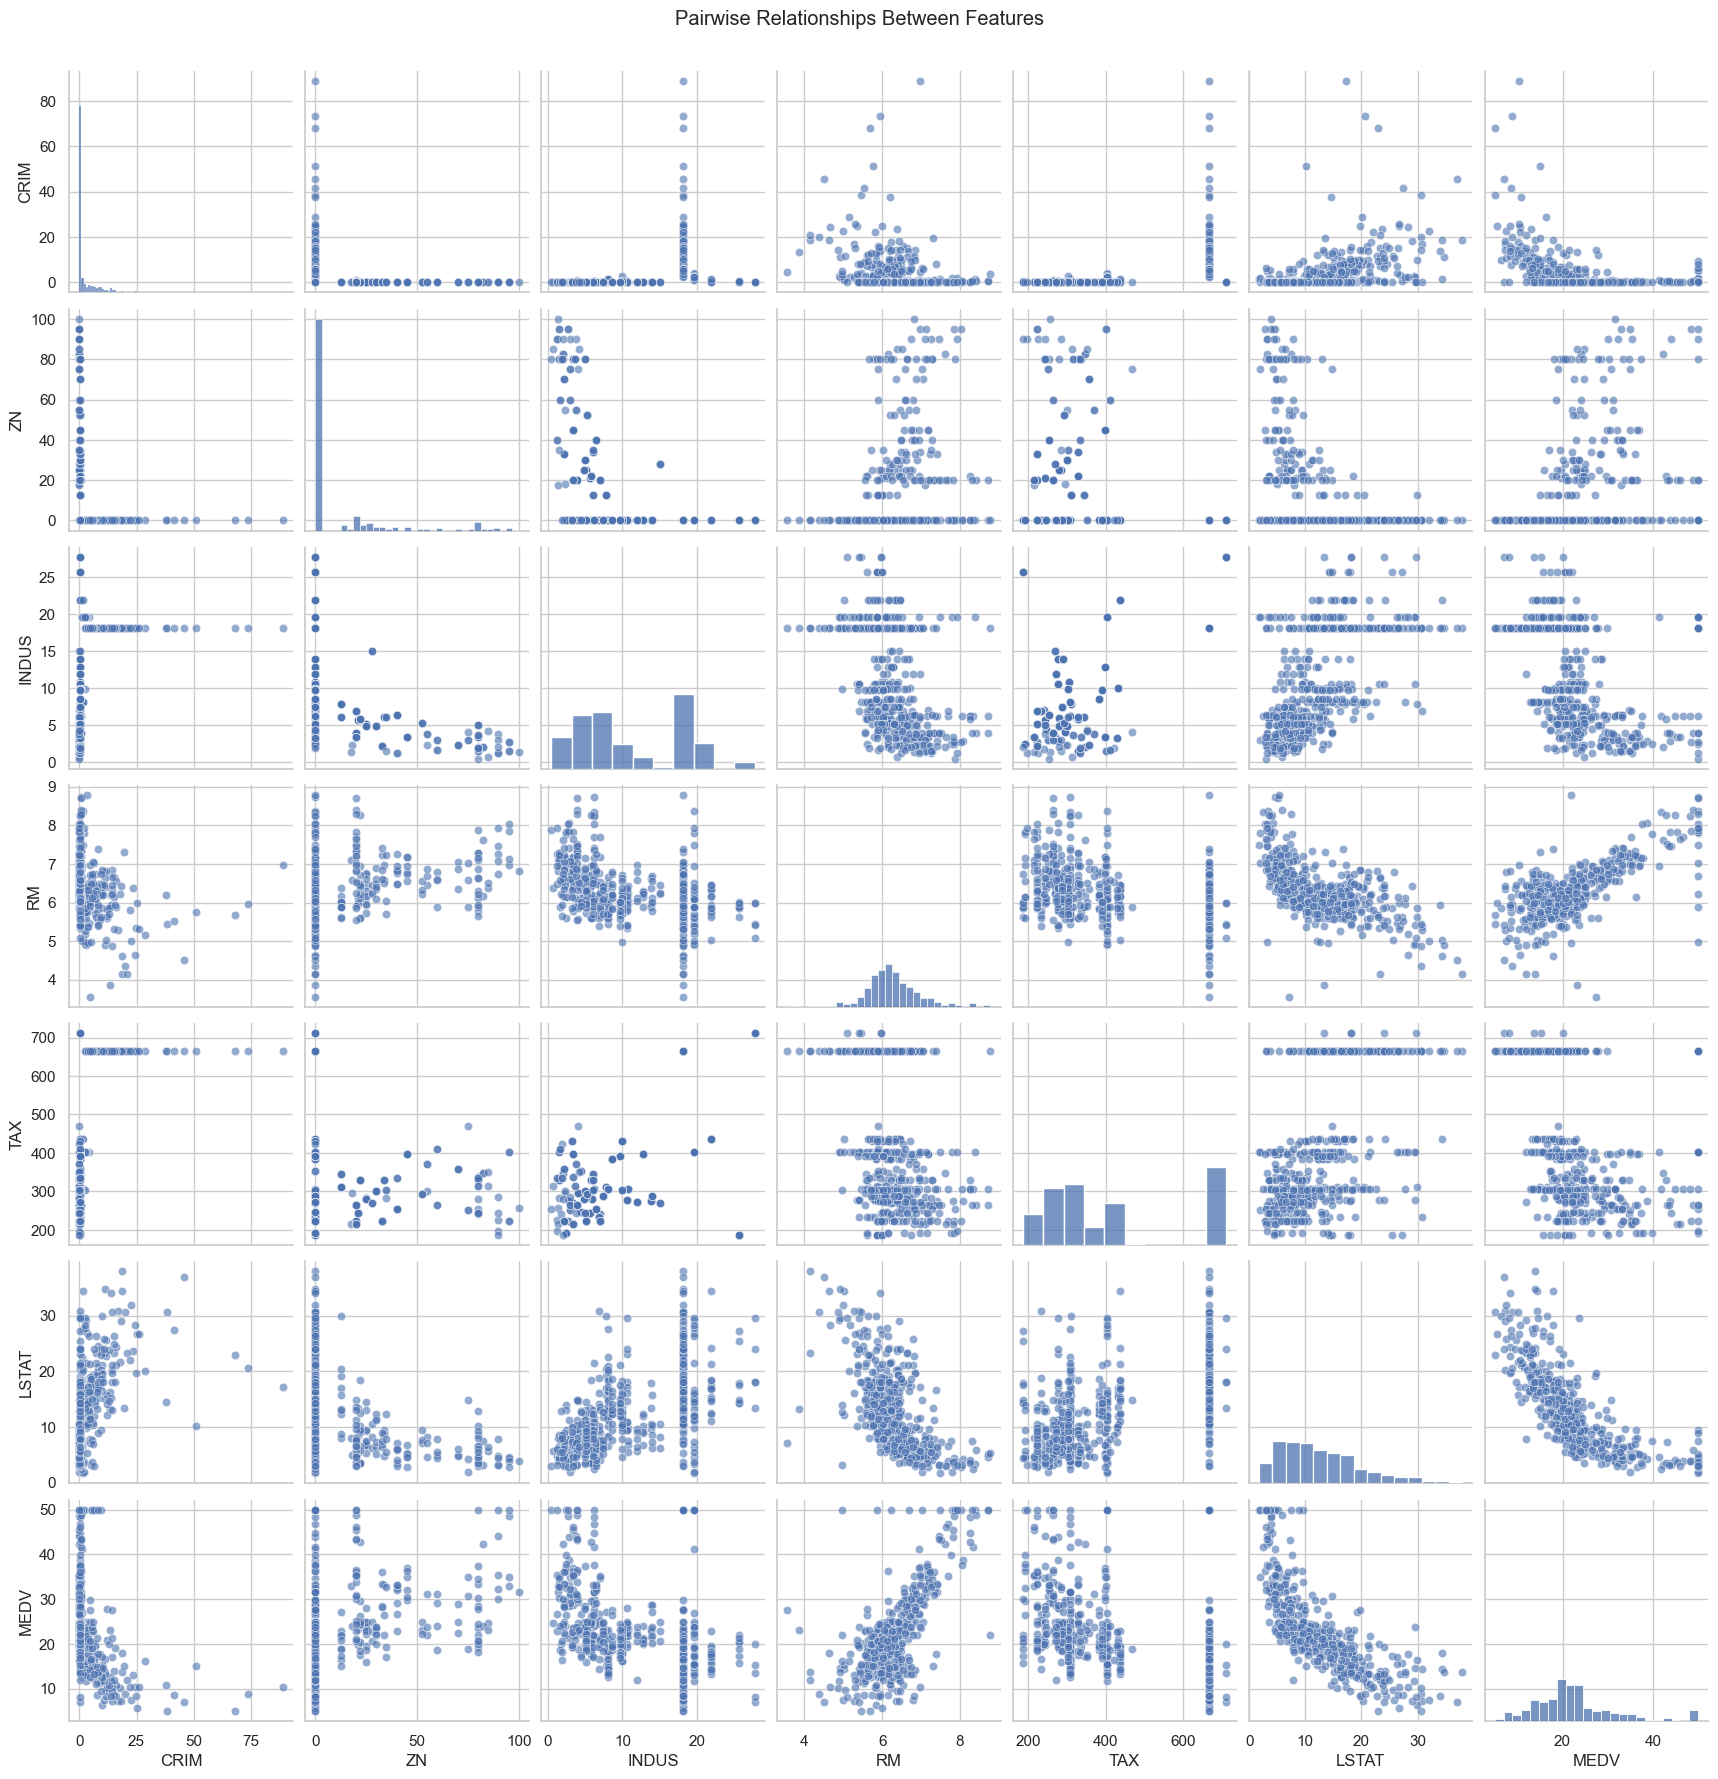

In [16]:
# Select features to plot
features = ['CRIM', 'ZN', 'INDUS', 'RM', 'TAX', 'LSTAT', 'MEDV']

# Pairplot to visualize interactions between features
sns.pairplot(df[features], kind='scatter', plot_kws={'alpha': 0.6})
plt.suptitle("Pairwise Relationships Between Features", y=1.02)
plt.show()

* RM (Rooms per Dwelling) stands out with a strong positive relationship with MEDV and weak associations with other features.
* LSTAT (Lower Status Population %) shows a negative relationship with MEDV and also correlates with CRIM.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Label encode the RAD feature
label_encoder = LabelEncoder()
df['RAD'] = label_encoder.fit_transform(df['RAD'])

In [18]:
df['RAD'].unique() 

array([0, 1, 3, 5, 4, 8, 6, 7, 2])

In [19]:
# Log transformation on skewed features
df['CRIM'] = np.log1p(df['CRIM'])
df['TAX'] = np.log1p(df['TAX'])
df['MEDV'] = np.log1p(df['MEDV'])

In [20]:
# Check the transformed data
df[['CRIM', 'TAX', 'MEDV']].describe()

,CRIM,TAX,MEDV
count,506.000000,506.000000,506.000000
mean,0.813418,5.934259,3.085437
std,1.022731,0.395337,0.386966
min,0.006300,5.236442,1.791759
25%,0.078853,5.634790,2.891757
50%,0.228336,5.802118,3.100092
75%,1.542674,6.502790,3.258097
max,4.499545,6.568078,3.931826


Log transformation reduces skewness in CRIM, TAX, and MEDV.

In [21]:
X = df.drop(columns=['MEDV'])  # Independent Variables
y = df['MEDV']  # Target Variable (House Price)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train-test split

In [23]:
from sklearn.model_selection import train_test_split

# Split Data into Train/Test Sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Train the Linear Regression Model

In [24]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

### Evaluate Model Performance

In [25]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate model performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display metrics
print(f"Linear Regression Model Performance:")
print(f"  MAE: {mae:.3f}")
print(f"  MSE: {mse:.3f}")
print(f"  RMSE: {rmse:.3f}")
print(f"  R2 Score: {r2:.3f}")

Linear Regression Model Performance:
  MAE: 0.134
  MSE: 0.042
  RMSE: 0.205
  R2 Score: 0.696


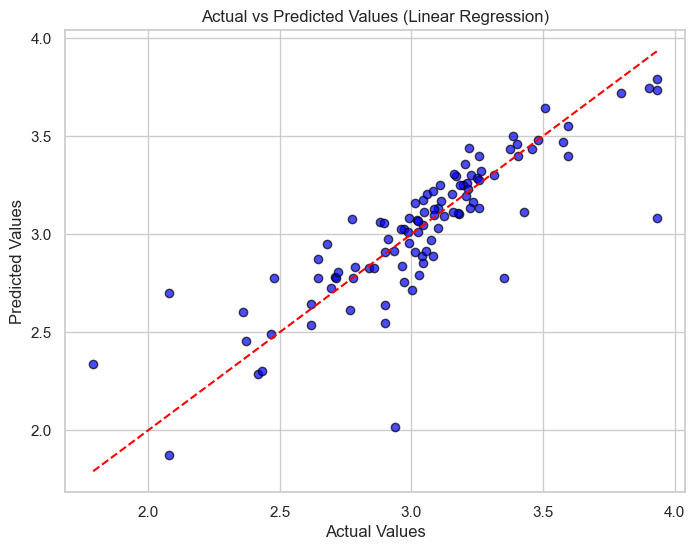

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='blue', edgecolor='black', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.show()

# Regularization 

In [27]:
# Hyperparameter grid for Ridge and Lasso
param_grid = {'alpha': np.logspace(-6, 6, 13)}

### Ridge Regularization

In [28]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5) # GridSearch for Ridge
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_
y_pred_ridge = best_ridge.predict(X_test)

In [29]:
print(f"Best alpha for Ridge: {ridge_grid.best_params_}")

Best alpha for Ridge: {'alpha': 10.0}


### Lasso Regularization 

In [30]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso_grid = GridSearchCV(lasso, param_grid, cv=5)# GridSearch for Lasso
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_
y_pred_lasso = best_lasso.predict(X_test)

In [31]:
print(f"Best alpha for Lasso: {lasso_grid.best_params_}")

Best alpha for Lasso: {'alpha': 0.001}


In [32]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name} Performance:")
    print(f"  MAE: {mae:.3f}")
    print(f"  MSE: {mse:.3f}")
    print(f"  RMSE: {rmse:.3f}")
    print(f"  R2 Score: {r2:.3f}")
    print("-" * 50)

### Evaluate Ridge and Lasso models

In [33]:
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Ridge Regression Performance:
  MAE: 0.133
  MSE: 0.042
  RMSE: 0.205
  R2 Score: 0.696
--------------------------------------------------
Lasso Regression Performance:
  MAE: 0.133
  MSE: 0.042
  RMSE: 0.205
  R2 Score: 0.698
--------------------------------------------------


### Plot coefficients for Ridge and Lasso

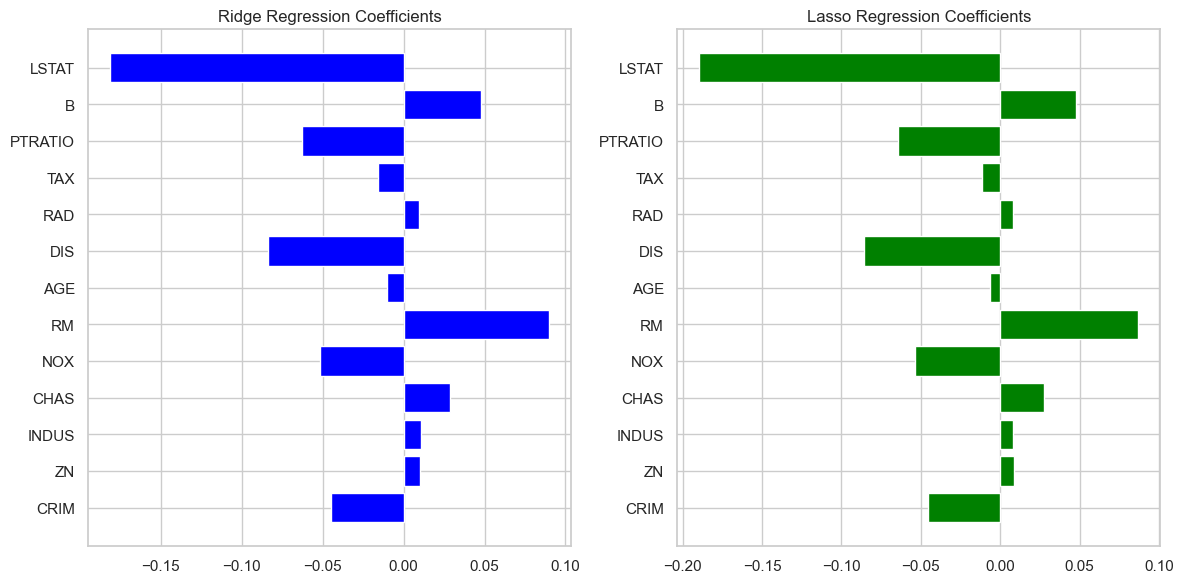

In [34]:
plt.figure(figsize=(12, 6))

# Ridge coefficients
plt.subplot(1, 2, 1)
plt.barh(X.columns, best_ridge.coef_, color='blue')
plt.title("Ridge Regression Coefficients")

# Lasso coefficients
plt.subplot(1, 2, 2)
plt.barh(X.columns, best_lasso.coef_, color='green')
plt.title("Lasso Regression Coefficients")

plt.tight_layout()
plt.show()


Some of the features shrinked more in Lasso than the Ridge

### ElasticNet Regularization 

In [35]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Initialize ElasticNet model
elastic_net = ElasticNet()

# Hyperparameter grid for ElasticNet
param_grid = {
    'alpha': np.logspace(-6, 6, 13),      # Regularization strength
    'l1_ratio': [0.1, 0.3, 0.5, 0.7, 1.0]  # Mix of Lasso and Ridge penalties
}

# GridSearch for ElasticNet
elastic_net_grid = GridSearchCV(elastic_net, param_grid, cv=5)
elastic_net_grid.fit(X_train, y_train)

# Best hyperparameters
print(f"Best alpha for ElasticNet: {elastic_net_grid.best_params_['alpha']}")
print(f"Best l1_ratio for ElasticNet: {elastic_net_grid.best_params_['l1_ratio']}")

Best alpha for ElasticNet: 0.01
Best l1_ratio for ElasticNet: 0.3


In [36]:
# Best ElasticNet model after GridSearchCV
best_elastic_net = elastic_net_grid.best_estimator_

# Predictions
y_pred_elastic_net = best_elastic_net.predict(X_test)

# Evaluate the ElasticNet model
evaluate_model(y_test, y_pred_elastic_net, "ElasticNet Regression")

ElasticNet Regression Performance:
  MAE: 0.132
  MSE: 0.042
  RMSE: 0.204
  R2 Score: 0.700
--------------------------------------------------


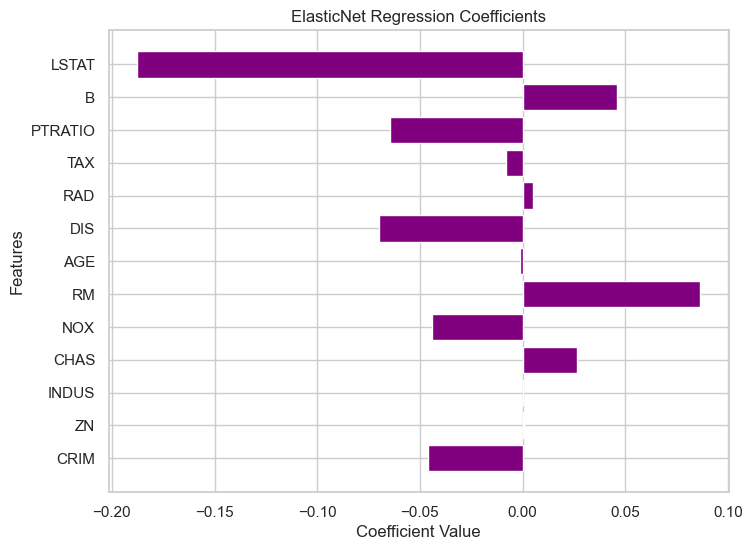

In [37]:
# Plot ElasticNet coefficients
plt.figure(figsize=(8, 6))
plt.barh(X.columns, best_elastic_net.coef_, color='purple')
plt.title("ElasticNet Regression Coefficients")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

ElasticNet can outperform Ridge or Lasso if there are correlations in the features, as it combines the strengths of both.